# 타이타닉
- 목표: 승객의 나이, 성별, 승객등급, 승선위치 등의 피처를 기반으로 승객의 생존여부 예측

In [31]:
import pandas as pd

train_data = pd.read_csv('./데이터_자료/titanic/train.csv')
test_data = pd.read_csv('./데이터_자료/titanic/test.csv')

train_data.shape, test_data.shape

((891, 12), (418, 11))

In [32]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [33]:
train_data = train_data.set_index('PassengerId')

In [34]:
test_data = test_data.set_index('PassengerId')

In [35]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [36]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data['Cabin'].fillna('N',inplace=True)
train_data['Embarked'].fillna('N',inplace=True)

In [37]:
train_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [38]:
print(train_data['Cabin'].value_counts())
print()
print(train_data['Embarked'].value_counts())

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [39]:
train_data['Cabin'] = train_data['Cabin'].str[0]

In [40]:
train_data.value_counts()

Survived  Pclass  Name                                                 Sex     Age        SibSp  Parch  Ticket            Fare      Cabin  Embarked
0         1       Allison, Miss. Helen Loraine                         female  2.000000   1      2      113781            151.5500  C      S           1
1         1       Flynn, Mr. John Irwin ("Irving")                     male    36.000000  0      0      PC 17474          26.3875   E      S           1
                  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.000000  1      0      PC 17599          71.2833   C      C           1
                  Daly, Mr. Peter Denis                                male    51.000000  0      0      113055            26.5500   E      S           1
                  Daniel, Mr. Robert Williams                          male    27.000000  0      0      113804            30.5000   N      S           1
                                                                                       

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

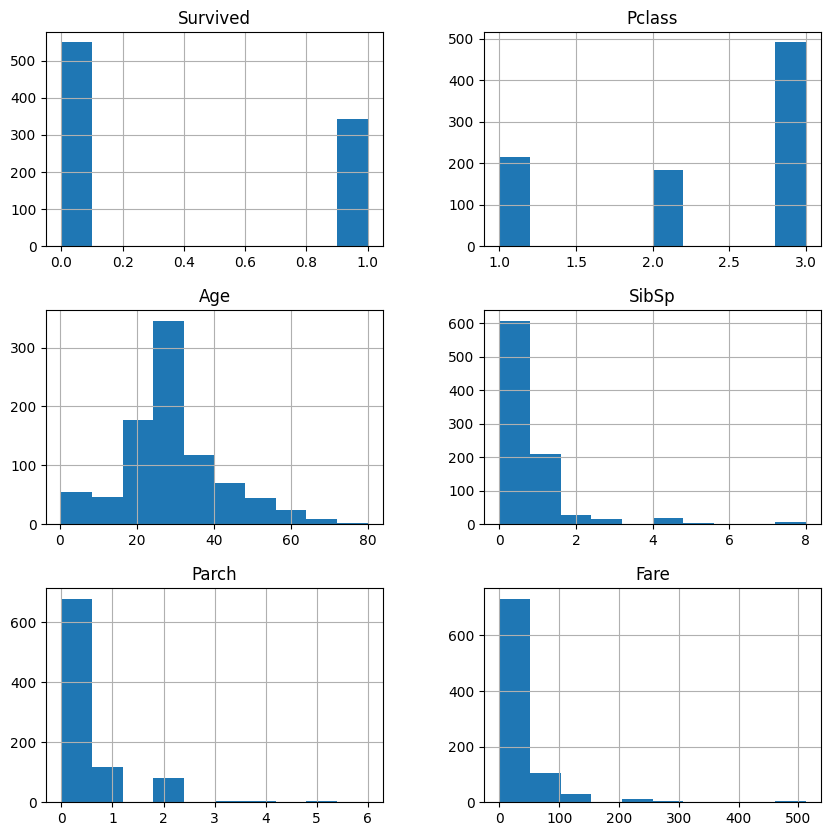

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

train_data.hist(figsize=(10,10))

<Axes: xlabel='Pclass', ylabel='Survived'>

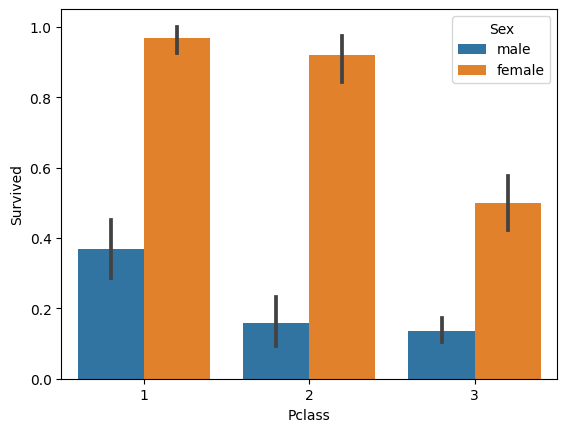

In [45]:
sns.barplot(x=train_data['Pclass'], y=train_data['Survived'],hue=train_data['Sex'])

In [46]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S


In [50]:
def age_category(age):
    if age <-1:
        category='Unknown'
    elif age<=5:
        category = 'Baby'
    elif age <=12:
        category = 'Child'
    elif age <=18:
        category = 'Teenager'
    elif age <=25:
        category = 'Student'
    elif age <=60:
        category = 'Adult'
    elif age>=61:
        category='Elderly'
    return category

train_data['Age_category'] = train_data['Age'].apply(lambda x:age_category(x))

In [51]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Student
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Adult


<Axes: xlabel='Age_category', ylabel='Survived'>

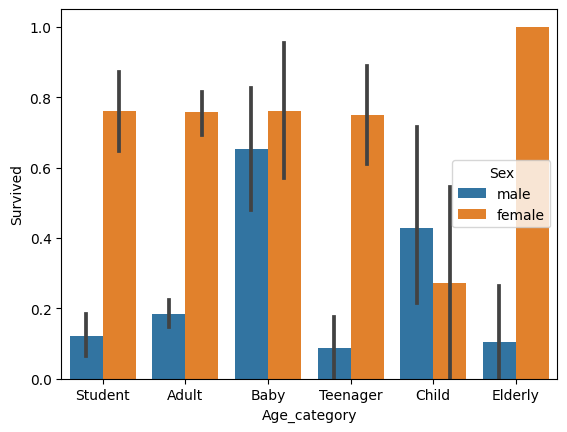

In [53]:
sns.barplot(x=train_data['Age_category'], y=train_data['Survived'],hue=train_data['Sex'])

In [54]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,Student
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,Adult
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,Adult
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,Adult
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,Student
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,Adult


In [57]:
from sklearn.preprocessing import LabelEncoder

def encoder(df):
    features=['Cabin','Sex','Embarked']
    for feature in features:
        label_encoder = LabelEncoder()
        label_encoder.fit(df[feature])
        df[feature] = label_encoder.transform(df[feature])
    return df


train_data = encoder(train_data)
train_data
    

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,3,Student
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0,Adult
3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,3,Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,3,Adult
5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,3,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,7,3,Adult
888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,3,Student
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,7,3,Adult


In [63]:
train_data =train_data.drop(['Name','Ticket'],axis=1)

In [64]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,7,3,Student
2,1,1,0,38.000000,1,0,71.2833,2,0,Adult
3,1,3,0,26.000000,0,0,7.9250,7,3,Adult
4,1,1,0,35.000000,1,0,53.1000,2,3,Adult
5,0,3,1,35.000000,0,0,8.0500,7,3,Adult
...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,13.0000,7,3,Adult
888,1,1,0,19.000000,0,0,30.0000,1,3,Student
889,0,3,0,29.699118,1,2,23.4500,7,3,Adult


In [69]:
#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df


#불필요 피처 제거 함수
def drop_features(df):
    df.drop(['Name','Ticket'],axis=1,inplace=True)
    return df

#레이블 인코딩 함수
def format_features(df):
        df['Cabin']=df['Cabin'].str[:1]
        features=['Cabin','Sex','Embarked']
        for feature in features:
            le = LabelEncoder()
            le.fit(df[feature])
            df[feature] = le.transform(df[feature])
            
        return df

# 위의 모든 것을 한번에 진행하기 하는 함수
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [70]:
test_data = transform_features(test_data)

In [71]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
892,3,1,34.50000,0,0,7.8292,7,1
893,3,0,47.00000,1,0,7.0000,7,2
894,2,1,62.00000,0,0,9.6875,7,1
895,3,1,27.00000,0,0,8.6625,7,2
896,3,0,22.00000,1,1,12.2875,7,2
...,...,...,...,...,...,...,...,...
1305,3,1,30.27259,0,0,8.0500,7,2
1306,1,0,39.00000,0,0,108.9000,2,0
1307,3,1,38.50000,0,0,7.2500,7,2


In [72]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,7,3,Student
2,1,1,0,38.000000,1,0,71.2833,2,0,Adult
3,1,3,0,26.000000,0,0,7.9250,7,3,Adult
4,1,1,0,35.000000,1,0,53.1000,2,3,Adult
5,0,3,1,35.000000,0,0,8.0500,7,3,Adult
...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,13.0000,7,3,Adult
888,1,1,0,19.000000,0,0,30.0000,1,3,Student
889,0,3,0,29.699118,1,2,23.4500,7,3,Adult


In [73]:
X_titanic_df = train_data.drop('Survived',axis=1)
y_titanic_df = train_data['Survived']

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
            X_titanic_df, y_titanic_df,
            test_size=0.2, random_state=11)

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

dt_clf  = DecisionTreeClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')
rf_clf = RandomForestClassifier(random_state=11)

In [77]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

ValueError: could not convert string to float: 'Teenager'